In [13]:
import os
import ee
import datetime
import time
import sklearn
import importlib

import geopandas as gp
import pandas as pd
import numpy as np
import rsfuncs as rs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from pandas.tseries.offsets import MonthEnd
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing

ee.Initialize()

In [14]:
# Load cv shapefile
cvsa = gp.read_file("../shape/cv.shp")
crs = {"init":"epsg:4326"}
cvsa.crs = crs

# CVW shapefile 
cvw = gp.read_file("../shape/HU4_merged.shp")

# irrigated / non irrigated areas 
irrigated = gp.read_file("../shape/irrigated.shp")
non_irrigated = gp.read_file("../shape/non_irrigated.shp")

# SSJT basins 
s = gp.read_file("../Shape/1802_4.shp")
sj = gp.read_file("../Shape/1804_4.shp")
t = gp.read_file("../Shape/1803_4.shp")

# grace footprint
grace_sa = gp.read_file("../shape/argus_grace.shp")

# Casgem wells 
casgem = gp.read_file("../shape/casgem_wells.shp")
casgem = gp.sjoin(casgem,cvsa, op ='within')

/anaconda3/envs/gis/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [15]:
# Make EE objects from shapefiles 

In [16]:
area_irr = rs.get_area(irrigated, fast = True)

In [17]:
area_non_irr = rs.get_area(non_irrigated, fast = True)

In [18]:
area_cv = rs.gdf_to_ee_poly(cvsa)

In [19]:
area_cvw = rs.gdf_to_ee_poly(cvw)

In [20]:
data = rs.load_data()

In [77]:
# Time params 
years = range(2001, 2018)
months = range(1,13)
start = datetime.datetime(years[0], 1, 1)
end = datetime.datetime(years[-1]+1, 2, 1)
dt_idx = pd.date_range(start,end, freq='M')

# Non irrigated ET

In [24]:
# Fetch AET in non-irrigated within CV 
fldas_aet = rs.calc_monthly_sum(data['fldas_aet'], years, months, area_non_irr)
modis_aet = rs.calc_monthly_sum(data['modis_aet'], years, months, area_non_irr)
tc_aet = rs.calc_monthly_sum(data['tc_aet'], years, months, area_non_irr)
gldas_aet = rs.calc_monthly_sum(data['gldas_aet'], years, months, area_non_irr)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/FLDAS/NOAH01/C/GL/M/V001"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "MODIS/006/MOD16A2"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 


In [25]:
# PET in non-irrigated (no gldas/nldas)
gmet_pet_non_irr = rs.calc_monthly_sum(data['gmet_eto'], years, months, area_non_irr)
gmet_pet2_non_irr = rs.calc_monthly_sum(data['gmet_etr'], years, months, area_non_irr)
modis_pet_non_irr = rs.calc_monthly_sum(data['modis_pet'], years, months, area_non_irr)
tc_pet_non_irr = rs.calc_monthly_sum(data['tc_pet'], years, months, area_non_irr)

# gldas_pet_non_irr = rs.calc_monthly_sum(data['gldas_pet'], years, months, area_non_irr)
# nldas_pet_non_irr = rs.calc_monthly_sum(data['nldas_pet'], years, months, area_non_irr)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "IDAHO_EPSCOR/GRIDMET"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "IDAHO_EPSCOR/GRIDMET"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 

# Irrigated ET

In [26]:
# Fetch PET data in irrigated
eto_g = rs.calc_monthly_sum(data['gmet_eto'],years, months, area_irr)
etr_g = rs.calc_monthly_sum(data['gmet_etr'],years, months, area_irr)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "IDAHO_EPSCOR/GRIDMET"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "IDAHO_EPSCOR/GRIDMET"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 

In [27]:
modis_pet = rs.calc_monthly_sum(data['modis_pet'], years, months, area_irr)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "MODIS/006/MOD16A2"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 


In [28]:
tc_pet = rs.calc_monthly_sum(data['tc_pet'], years, months, area_irr)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "IDAHO_EPSCOR/TERRACLIMATE"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 


In [29]:
gldas_pet = rs.calc_monthly_sum(data['gldas_pet'], years, months, area_irr)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 


In [31]:
nldas_pet = rs.calc_monthly_sum(data['nldas_pet'], years, months, area_irr)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/NLDAS/FORA0125_H002"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 


In [32]:
# Make the objects into a dict, sum the irrigated PET and non irrigated AET 
d_aet_irr = {"fldas_aet": fldas_aet,  "gldas_aet":gldas_aet, "modis_aet":modis_aet, "tc_aet": tc_aet}
d_pet_irr = {"nldas_etr": nldas_pet, "gldas_etr": gldas_pet, "gmet_eto": eto_g, "gmet_etr": etr_g, "modis_pet": modis_pet, "tc_pet":tc_pet}

cv_ag_dict_list = [d_aet_irr, d_pet_irr]

# Whole Central Valley

In [33]:
# AET (subtract from CVW)
cv_fldas_aet = rs.calc_monthly_sum(data['fldas_aet'], years, months, area_cv)
cv_modis_aet = rs.calc_monthly_sum(data['modis_aet'], years, months, area_cv)
cv_tc_aet = rs.calc_monthly_sum(data['tc_aet'], years, months, area_cv)
cv_gldas_aet = rs.calc_monthly_sum(data['gldas_aet'], years, months, area_cv)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/FLDAS/NOAH01/C/GL/M/V001"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "MODIS/006/MOD16A2"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 


In [34]:
# PET (subtract from cvw)
cv_gmet_pet = rs.calc_monthly_sum(data['gmet_eto'], years, months, area_cv)
cv_gmet_pet2 = rs.calc_monthly_sum(data['gmet_etr'], years, months, area_cv)
cv_modis_pet = rs.calc_monthly_sum(data['modis_pet'], years, months, area_cv)
cv_tc_pet = rs.calc_monthly_sum(data['tc_pet'], years, months, area_cv)


processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "IDAHO_EPSCOR/GRIDMET"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "IDAHO_EPSCOR/GRIDMET"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 

In [35]:
cv_gldas_pet = rs.calc_monthly_sum(data['gldas_pet'], years, months, area_cv)


processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/NLDAS/FORA0125_H002"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78

EEException: Earth Engine memory capacity exceeded.

In [36]:
cv_nldas_pet = rs.calc_monthly_sum(data['nldas_pet'], years, months, area_cv)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/NLDAS/FORA0125_H002"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 


In [38]:
# Soil moisture
cv_tc_sm = rs.calc_monthly_sum(data['tc_sm'], years, months, area_cv)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "IDAHO_EPSCOR/TERRACLIMATE"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 


In [39]:
cv_gldsm1 = rs.calc_monthly_sum(data['gsm1'], years, months, area_cv)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 


EEException: Earth Engine memory capacity exceeded.

In [40]:
cv_gldsm2 = rs.calc_monthly_sum(data['gsm2'], years, months, area_cv)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 


KeyboardInterrupt: 

In [41]:
cv_gldsm3 = rs.calc_monthly_sum(data['gsm3'], years, months, area_cv)
cv_gldsm4 = rs.calc_monthly_sum(data['gsm4'], years, months, area_cv)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 

In [42]:
cv_gldas_sm = rs.calc_monthly_sum(data['gldas_sm'], years ,months,area_cv)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 


In [43]:
# Precipitation
cv_p_p = rs.calc_monthly_sum(data['prism'], years, months, area_cv)
cv_p_c = rs.calc_monthly_sum(data['chirps'], years, months, area_cv)
cv_p_n = rs.calc_monthly_sum(data['persia'], years, months, area_cv)
cv_p_t = rs.calc_monthly_sum(data['trmm'], years, months, area_cv)
cv_p_d = rs.calc_monthly_sum(data['dmet'], years, months, area_cv)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "OREGONSTATE/PRISM/AN81m"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "UCSB-CHG/CHIRPS/PENTAD"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
8

In [44]:
# Runoff
cv_r_tc = rs.calc_monthly_sum(data['tc_r'], years, months, area_cv)
cv_r_fldas = rs.calc_monthly_sum(data['fldas_r'], years, months, area_cv)

cv_gldas_ssr = rs.calc_monthly_sum(data['ssr'], years, months, area_cv)
cv_gldas_bfr = rs.calc_monthly_sum(data['bfr'], years, months, area_cv)
cv_gldas_qsm = rs.calc_monthly_sum(data['qsm'], years, months, area_cv)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "IDAHO_EPSCOR/TERRACLIMATE"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/FLDAS/NOAH01/C/GL/M/V001"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
7

In [45]:
# Make a df from everything 
cv_d_r = {"gldas_ssr":cv_gldas_ssr, "gldas_bfr": cv_gldas_bfr, "gldas_qsm": cv_gldas_qsm,
       "gldas":np.column_stack(np.array(x) for x in [cv_gldas_ssr,cv_gldas_bfr,cv_gldas_qsm]).sum(axis=1), 
       "fldas_r": cv_r_fldas, "tc_r": cv_r_tc}

cv_d_p = {'p_prism': cv_p_p, "p_chirps": cv_p_c, "p_persiann": cv_p_n,"p_trmm": cv_p_t, "p_daymet": cv_p_d}
cv_d_sm = {"gldas_sm": cv_gldas_sm, "tc_sm": cv_tc_sm, 
           "gldas_m": np.column_stack(np.array(x) for x in [cv_gldsm1,cv_gldsm2,cv_gldsm3, cv_gldsm4]).mean(axis=1)}
cv_d_aet = {"fldas_aet": cv_fldas_aet,  "gldas_aet":cv_gldas_aet, "modis_aet":cv_modis_aet, "tc_aet": cv_tc_aet}
cv_d_pet = {"nldas_etr": cv_nldas_pet, "gldas_etr": cv_gldas_pet, "gmet_eto": cv_gmet_pet, "gmet_etr": cv_gmet_pet2, "modis_pet": cv_modis_pet, "tc_pet":cv_tc_pet}


cv_dict_list = [cv_d_r, cv_d_p, cv_d_sm, cv_d_aet, cv_d_pet]

# Central Valley Watershed 

In [46]:
# AET (don't need PET)
cvw_fldas_aet = rs.calc_monthly_sum(data['fldas_aet'], years, months, area_cvw)
cvw_modis_aet = rs.calc_monthly_sum(data['modis_aet'], years, months, area_cvw)
cvw_tc_aet = rs.calc_monthly_sum(data['tc_aet'], years, months, area_cvw)
cvw_gldas_aet = rs.calc_monthly_sum(data['gldas_aet'], years, months, area_cvw)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/FLDAS/NOAH01/C/GL/M/V001"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "MODIS/006/MOD16A2"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 


In [47]:
# PET
cvw_gmet_pet = rs.calc_monthly_sum(data['gmet_eto'], years, months, area_cvw)
cvw_gmet_pet2 = rs.calc_monthly_sum(data['gmet_etr'], years, months, area_cvw)
cvw_modis_pet = rs.calc_monthly_sum(data['modis_pet'], years, months, area_cvw)
cvw_tc_pet = rs.calc_monthly_sum(data['tc_pet'], years, months, area_cvw)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "IDAHO_EPSCOR/GRIDMET"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "IDAHO_EPSCOR/GRIDMET"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 

In [48]:
cvw_gldas_pet = rs.calc_monthly_sum(data['gldas_pet'], years, months, area_cvw)
cvw_nldas_pet = rs.calc_monthly_sum(data['nldas_pet'], years, months, area_cvw)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/NLDAS/FORA0125_H002"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78

In [49]:
# Precipitation
cvw_p_p = rs.calc_monthly_sum(data['prism'], years, months, area_cvw)
cvw_p_c = rs.calc_monthly_sum(data['chirps'], years, months, area_cvw)
cvw_p_n = rs.calc_monthly_sum(data['persia'], years, months, area_cvw)
cvw_p_t = rs.calc_monthly_sum(data['trmm'], years, months, area_cvw)
cvw_p_d = rs.calc_monthly_sum(data['dmet'], years, months, area_cvw)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "OREGONSTATE/PRISM/AN81m"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "UCSB-CHG/CHIRPS/PENTAD"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
8

In [50]:
# Runoff
cvw_r_tc = rs.calc_monthly_sum(data['tc_r'], years, months, area_cvw)
cvw_r_fldas = rs.calc_monthly_sum(data['fldas_r'], years, months, area_cvw)

cvw_gldas_ssr = rs.calc_monthly_sum(data['ssr'], years, months, area_cvw)
cvw_gldas_bfr = rs.calc_monthly_sum(data['bfr'], years, months, area_cvw)
cvw_gldas_qsm = rs.calc_monthly_sum(data['qsm'], years, months, area_cvw)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "IDAHO_EPSCOR/TERRACLIMATE"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/FLDAS/NOAH01/C/GL/M/V001"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
7

In [51]:
#SWE
cvw_gldas_swe = rs.calc_monthly_sum(data['gldas_swe'], years, months, area_cvw)
cvw_fldas_swe = rs.calc_monthly_sum(data['fldas_swe'], years, months, area_cvw)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/FLDAS/NOAH01/C/GL/M/V001"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 

In [52]:
# SM
cvw_gldas_sm = rs.calc_monthly_sum(data['gldas_sm'], years ,months,area_cvw)
cvw_tc_sm = rs.calc_monthly_sum(data['tc_sm'], years, months, area_cvw)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
wrapper complete


In [53]:
cvw_gldsm1 = rs.calc_monthly_sum(data['gsm1'], years, months, area_cvw)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 


KeyboardInterrupt: 

In [54]:
cvw_tc_sm = rs.calc_monthly_sum(data['tc_sm'], years, months, area_cvw)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "IDAHO_EPSCOR/TERRACLIMATE"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 


In [55]:
cvw_gldsm2 = rs.calc_monthly_sum(data['gsm2'], years, months, area_cvw)
cvw_gldsm3 = rs.calc_monthly_sum(data['gsm3'], years, months, area_cvw)
cvw_gldsm4 = rs.calc_monthly_sum(data['gsm4'], years, months, area_cvw)

processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 % 
78.04 % 
80.48 % 
82.92 % 
85.36 % 
87.80 % 
90.24 % 
92.68 % 
95.12 % 
97.56 % 
processing:
ee.ImageCollection({
  "type": "Invocation",
  "arguments": {
    "id": "NASA/GLDAS/V021/NOAH/G025/T3H"
  },
  "functionName": "ImageCollection.load"
})
progress:
0.0 % 
2.439 % 
4.878 % 
7.317 % 
9.756 % 
12.19 % 
14.63 % 
17.07 % 
19.51 % 
21.95 % 
24.39 % 
26.82 % 
29.26 % 
31.70 % 
34.14 % 
36.58 % 
39.02 % 
41.46 % 
43.90 % 
46.34 % 
48.78 % 
51.21 % 
53.65 % 
56.09 % 
58.53 % 
60.97 % 
63.41 % 
65.85 % 
68.29 % 
70.73 % 
73.17 % 
75.60 

In [56]:
# Make a df from everything 
cvw_d_aet = {"fldas_aet": cvw_fldas_aet,  "gldas_aet":cvw_gldas_aet, "modis_aet":cvw_modis_aet, "tc_aet": cvw_tc_aet}
cvw_d_pet = {"nldas_etr": cvw_nldas_pet, "gldas_etr": cvw_gldas_pet, "gmet_eto": cvw_gmet_pet, "gmet_etr": cvw_gmet_pet2, "modis_pet": cvw_modis_pet, "tc_pet":cvw_tc_pet}

cvw_d_r = {"gldas_ssr":cvw_gldas_ssr , "gldas_bfr": cvw_gldas_bfr, "gldas_qsm": cvw_gldas_qsm,
       "gldas":np.column_stack(np.array(x) for x in [cvw_gldas_ssr,cvw_gldas_bfr,cvw_gldas_qsm]).sum(axis=1), 
       "fldas_r": cvw_r_fldas, "tc_r": cvw_r_tc}
cvw_d_p = {'p_prism': cvw_p_p, "p_chirps": cvw_p_c, "p_persiann": cvw_p_n,"p_trmm": cvw_p_t, "p_daymet": cvw_p_d}
cvw_d_sm = {"gldas_sm": cvw_gldas_sm, "tc_sm": cvw_tc_sm, 
           "gldas_m": np.column_stack(np.array(x) for x in [cvw_gldsm1,cvw_gldsm2,cvw_gldsm3, cvw_gldsm4]).mean(axis=1)}

cvw_d_swe = {"fldas_swe": cvw_fldas_swe, "gldas_swe": cvw_gldas_swe}

cvw_dict_list = [cvw_d_aet,cvw_d_pet, cvw_d_r, cvw_d_p, cvw_d_sm,cvw_d_swe]


In [57]:
# Make DFs from the areas

In [78]:
def dl_2_df(dict_list):
    alldat = [item for sublist in [x.values() for x in dict_list] for item in sublist]
    # Make the df
    alldata = pd.DataFrame(alldat).T
    alldata.index = dt_idx
    col_headers = [item for sublist in [x.keys() for x in dict_list] for item in sublist]
    alldata.columns = col_headers

    return alldata


In [193]:
cv_dat = dl_2_df(cv_dict_list)
cv_ag_dat = dl_2_df(cv_ag_dict_list)
cvw_dat = dl_2_df(cvw_dict_list)

In [80]:
cv_dat.to_csv("wrr_hydra_cv_dat.csv")
cv_ag_dat.to_csv("wrr_hydra_cv_ag_dat.csv")
cvw_dat.to_csv("wrr_hyra_cvw_dat.csv")

In [194]:
# Apply crop coefficients to Et0 data (CV only)

df3 = pd.read_csv("../data/et_kc.csv")
etdf = rs.col_to_dt(df3)

# Select the first year of scaling factors and apply this to the first 7 years of data
repeat_arr = etdf.et_multiplier[0:12]

# Merge with cvdf
cvet = pd.merge(cv_dat, etdf,how = "outer", left_index = True, right_index = True)

In [195]:
# Make 7 concats of the yearly dataframe, fill the nans in the cvdf with that
temp = pd.DataFrame(repeat_arr)
temp = pd.concat([temp]*7, ignore_index=True)

cvet.et_multiplier[cvet.et_multiplier.isna()] = temp[temp.columns[0]].values

In [196]:
# Set the new kc factor column in the cv df 
cv_dat["et_multiplier"] = cvet.et_multiplier

# Subtract the CV ET vals from the cv watershed Et vals to isolate the non-CV AET
aet_cols = ['fldas_aet', 'gldas_aet', 'modis_aet', "tc_aet"]
for i in aet_cols:
    cvw_dat[i] = cvw_dat[i] - cv_dat[i]

pet_cols = ['nldas_etr', 'gldas_etr', 'modis_pet', "tc_pet", "gmet_eto", "gmet_etr"]
for i in pet_cols:
    cvw_dat[i] = cvw_dat[i] - cv_dat[i]


In [197]:
# For the irrigated / nonirrigated  ET dicts: 

# Make a dataframe from everything
et_data = [item for sublist in [d_aet_irr.values(), d_pet_irr.values()] for item in sublist]
et_data = pd.DataFrame(et_data).T
et_data.index = dt_idx
col_headers = [item for sublist in [d_aet_irr.keys(), d_pet_irr.keys()] for item in sublist]
et_data.columns = col_headers


In [198]:
# multiply PETs by the crop coefficient df
et_data[list(d_pet_irr.keys())] = et_data[list(d_pet_irr.keys())].multiply(cvet["et_multiplier"], axis="index")

In [199]:
# Sum the mean PETS and AETs to get effective et estimates for the CV 
et_data['aet_mean'] = np.mean([et_data.fldas_aet, et_data.gldas_aet, et_data.modis_aet, et_data.tc_aet], axis = 0)
et_data['pet_mean'] = np.mean([et_data.gmet_etr, et_data.gmet_eto, et_data.modis_pet, et_data.tc_pet, et_data.gldas_etr,  et_data.nldas_etr], axis = 0) # et_data.nldas_etr, et_data.gldas_etr, et_data.gmet_eto, 
et_data['et_eff'] = np.mean([et_data.modis_aet + et_data.modis_pet, et_data.tc_aet + et_data.tc_pet, et_data.gldas_aet + et_data.gldas_etr], axis = 0)#np.sum([et_data.aet_mean, et_data.pet_mean], axis = 0)


In [200]:
# Confirm the dataframe lengths:
len(cvw_dat), len(cv_dat), len(cv_ag_dat), len(et_data)

(205, 205, 205, 205)

In [201]:
# Now, merge the CV and CVW reservoir storage data and Qs data. 
res_cvw = pd.read_csv('../data/reservoir_storage_ssjt.csv')
res_cv = pd.read_csv("../data/reservoir_storage.csv")
q_in = pd.read_csv("../data/Qs_in_monthly.csv", header = None)
q_out = pd.read_csv("../data/Qs_out_monthly.csv", header = None)

# Set 0th col to datetime s
res_cvw = rs.col_to_dt(res_cvw)
res_cv = rs.col_to_dt(res_cv)
q_in = rs.col_to_dt(q_in)
q_out = rs.col_to_dt(q_out)

In [202]:
q_out.columns = ["q_out"]
q_in.columns = ["q_in"]

In [203]:
# Merge relevant dataframes

# CV and CVW Res storage
cv_dat_t1 = pd.merge(cv_dat,res_cv, how = 'inner', left_index = True, right_index = True)
cvw_dat_t1 = pd.merge(cvw_dat,res_cvw, how = 'inner', left_index = True, right_index = True)

# CV and CVW outflow
cv_dat_t2 = pd.merge(cv_dat_t1,q_out, how = 'inner', left_index = True, right_index = True)
cvw_dat_t2 = pd.merge(cvw_dat_t1,q_out, how = 'inner', left_index = True, right_index = True)

# CV inflow 
cv_dat_t3 = pd.merge(cv_dat_t2,q_in, how = 'inner', left_index = True, right_index = True)


In [204]:
# Calculate ET for the CV watershed as CV PET + CVW AET watershed 
cvwdf = cvw_dat_t2.copy()
cv_df = cv_dat_t2.copy()

# # AET
# for i in list(d_aet_irr.keys()):
#     cvwdf[i] = cvwdf[i] + cv_df[i]

# # PET 
# for i in list(d_pet_irr.keys()):
#     cvwdf[i] = cvwdf[i] + cv_df[i]


In [205]:
# Replace the columns in the CV df with the irrigated / nonirrigated values 
cv_dat_t3.update(et_data)
df = cv_dat_t3.copy()

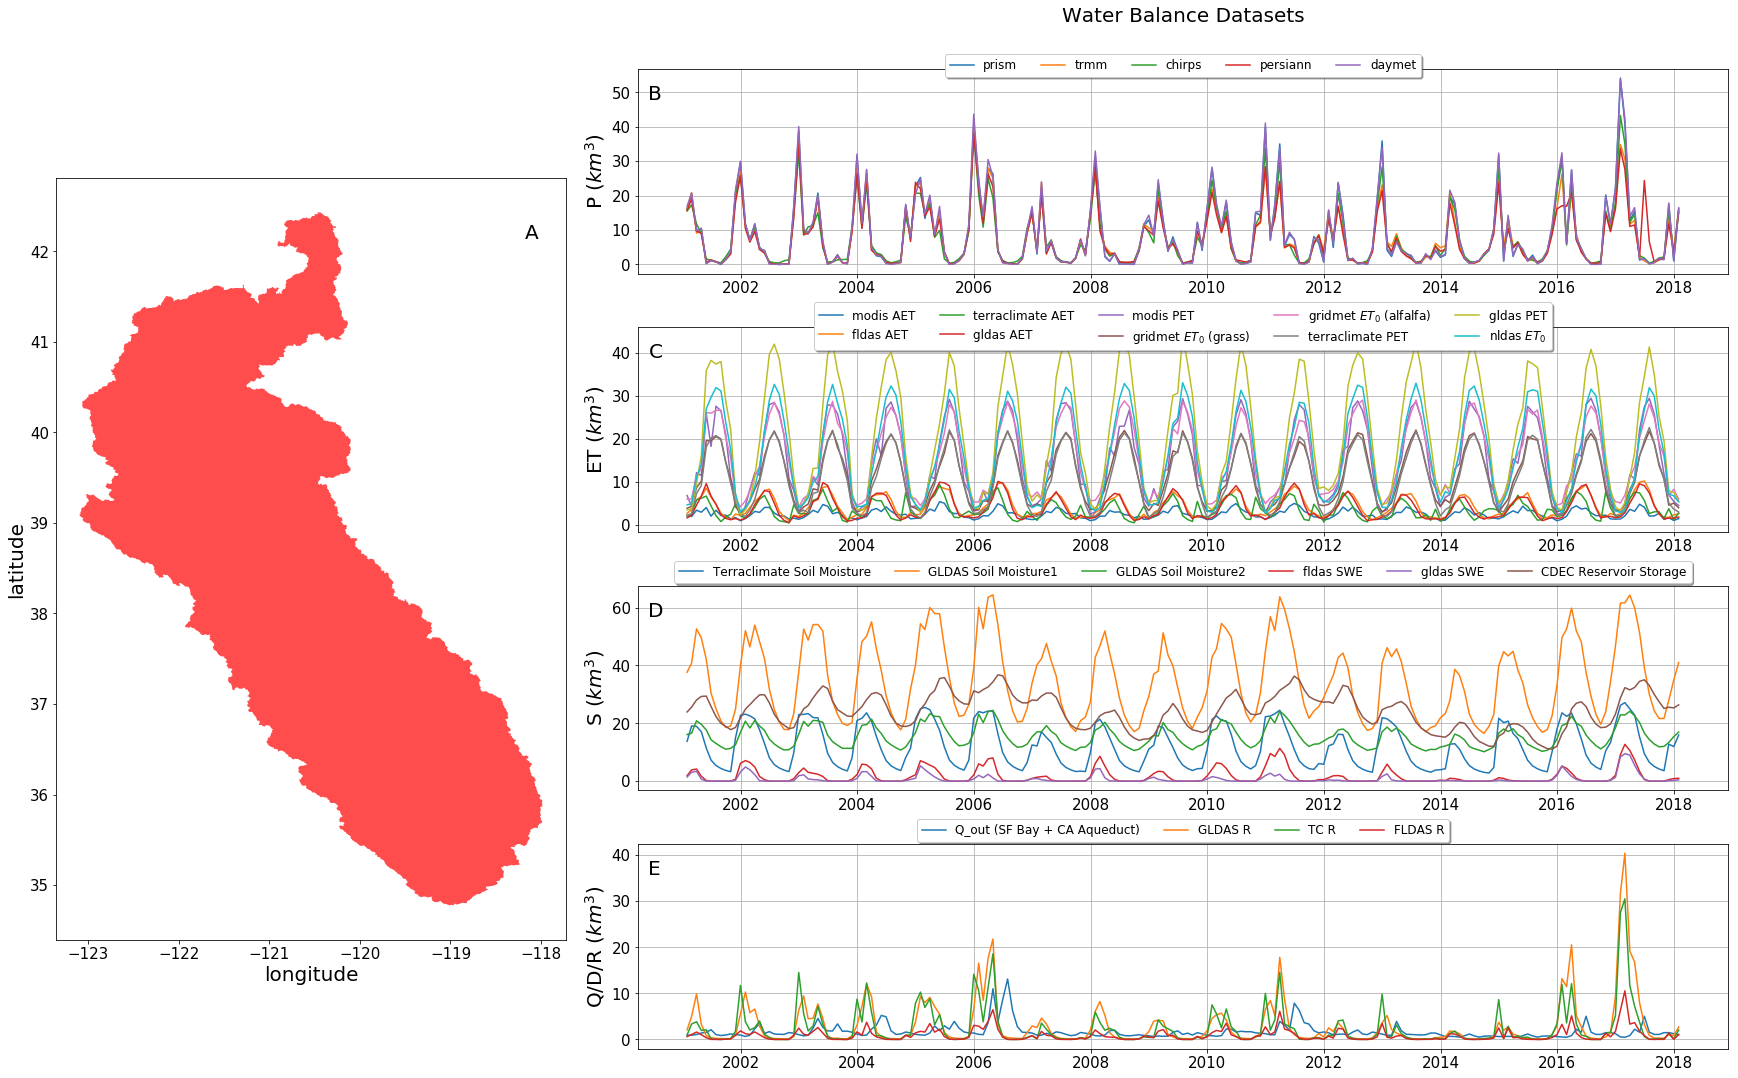

In [206]:
# Plot all the data for CVW

plt.figure(figsize=(25, 15))

G = gridspec.GridSpec(4, 3)

# Plot the basemaps
axes_1 = plt.subplot(G[:, 0])
cvw.plot(ax=axes_1, color = "red", alpha = 0.7)
axes_1.set_xlabel("longitude", size = 20)
axes_1.set_ylabel("latitude", size = 20)
axes_1.annotate("A", xy=(0.92, 0.92), xycoords="axes fraction", size = 20)
axes_1.tick_params(axis='both', which='major', labelsize=15)

# Precip
axes_2 = plt.subplot(G[0:1, 1:])
axes_2.set_title("Water Balance Datasets", size = 20, y=1.2)
axes_2.plot(cvwdf.index, cvwdf.p_prism, label = "prism")
axes_2.plot(cvwdf.index, cvwdf.p_trmm, label = "trmm")
axes_2.plot(cvwdf.index, cvwdf.p_chirps, label = "chirps")
axes_2.plot(cvwdf.index, cvwdf.p_persiann, label = "persiann")
axes_2.plot(cvwdf.index, cvwdf.p_daymet, label = "daymet")
axes_2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), fancybox=True, shadow=True, ncol=7, prop = {"size":12})
axes_2.set_ylabel("P ($km^3$)", size = 20)
# axes_2.set_xticklabels([])
axes_2.annotate("B", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_2.tick_params(axis='both', which='major', labelsize=15)
axes_2.grid(True)

# AET
axes_3 = plt.subplot(G[1:2, 1:])
axes_3.plot(cvwdf.index, cvwdf.modis_aet, label = "modis AET")
axes_3.plot(cvwdf.index, cvwdf.fldas_aet, label = "fldas AET")
axes_3.plot(cvwdf.index, cvwdf.tc_aet, label = "terraclimate AET")
axes_3.plot(cvwdf.index, cvwdf.gldas_aet, label = "gldas AET")

# PET
axes_3.plot(cvwdf.index, cvwdf.modis_pet, label = "modis PET")
axes_3.plot(cvwdf.index, cvwdf.gmet_eto, label = "gridmet $ET_0$ (grass)")
axes_3.plot(cvwdf.index, cvwdf.gmet_etr, label = "gridmet $ET_0$ (alfalfa)")
axes_3.plot(cvwdf.index, cvwdf.tc_pet, label = "terraclimate PET")
axes_3.plot(cvwdf.index, cvwdf.gldas_etr, label = "gldas PET")
axes_3.plot(cvwdf.index, cvwdf.nldas_etr, label = "nldas $ET_0$")

axes_3.set_ylabel("ET ($km^3$)", size = 20)
axes_3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=5, prop = {"size":12})
axes_3.annotate("C", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_3.tick_params(axis='both', which='major', labelsize=15)
axes_3.grid(True)

# SM / SWE / Surface Storage
axes_4 = plt.subplot(G[2:3, 1:])
axes_4.plot(cvwdf.index, cvwdf.tc_sm, label = "Terraclimate Soil Moisture")
axes_4.plot(cvwdf.index, cvwdf.gldas_sm, label = "GLDAS Soil Moisture1")
axes_4.plot(cvwdf.index, cvwdf.gldas_m, label = "GLDAS Soil Moisture2")
axes_4.plot(cvwdf.index, cvwdf.fldas_swe, label = "fldas SWE")
axes_4.plot(cvwdf.index, cvwdf.gldas_swe, label = "gldas SWE")
axes_4.plot(cvwdf.index, cvwdf.storage_km3, label = "CDEC Reservoir Storage")
axes_4.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=7, prop = {"size":12})
axes_4.set_ylabel("S ($km^3$)", size = 20)
axes_4.annotate("D", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_4.tick_params(axis='both', which='major', labelsize=15)
axes_4.grid(True)

axes_5 = plt.subplot(G[3:4, 1:])
axes_5.plot(cvwdf.index, cvwdf.q_out, label = "Q_out (SF Bay + CA Aqueduct)")
axes_5.plot(cvwdf.index, cvwdf.gldas, label = "GLDAS R")
axes_5.plot(cvwdf.index, cvwdf.tc_r, label = "TC R")
axes_5.plot(cvwdf.index, cvwdf.fldas_r, label = "FLDAS R")
axes_5.set_ylabel("Q/D/R ($km^3$)", size = 20)
axes_5.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=7, prop = {"size":12})
axes_5.annotate("E", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_5.tick_params(axis='both', which='major', labelsize=15)
axes_5.grid(True)

plt.tight_layout()

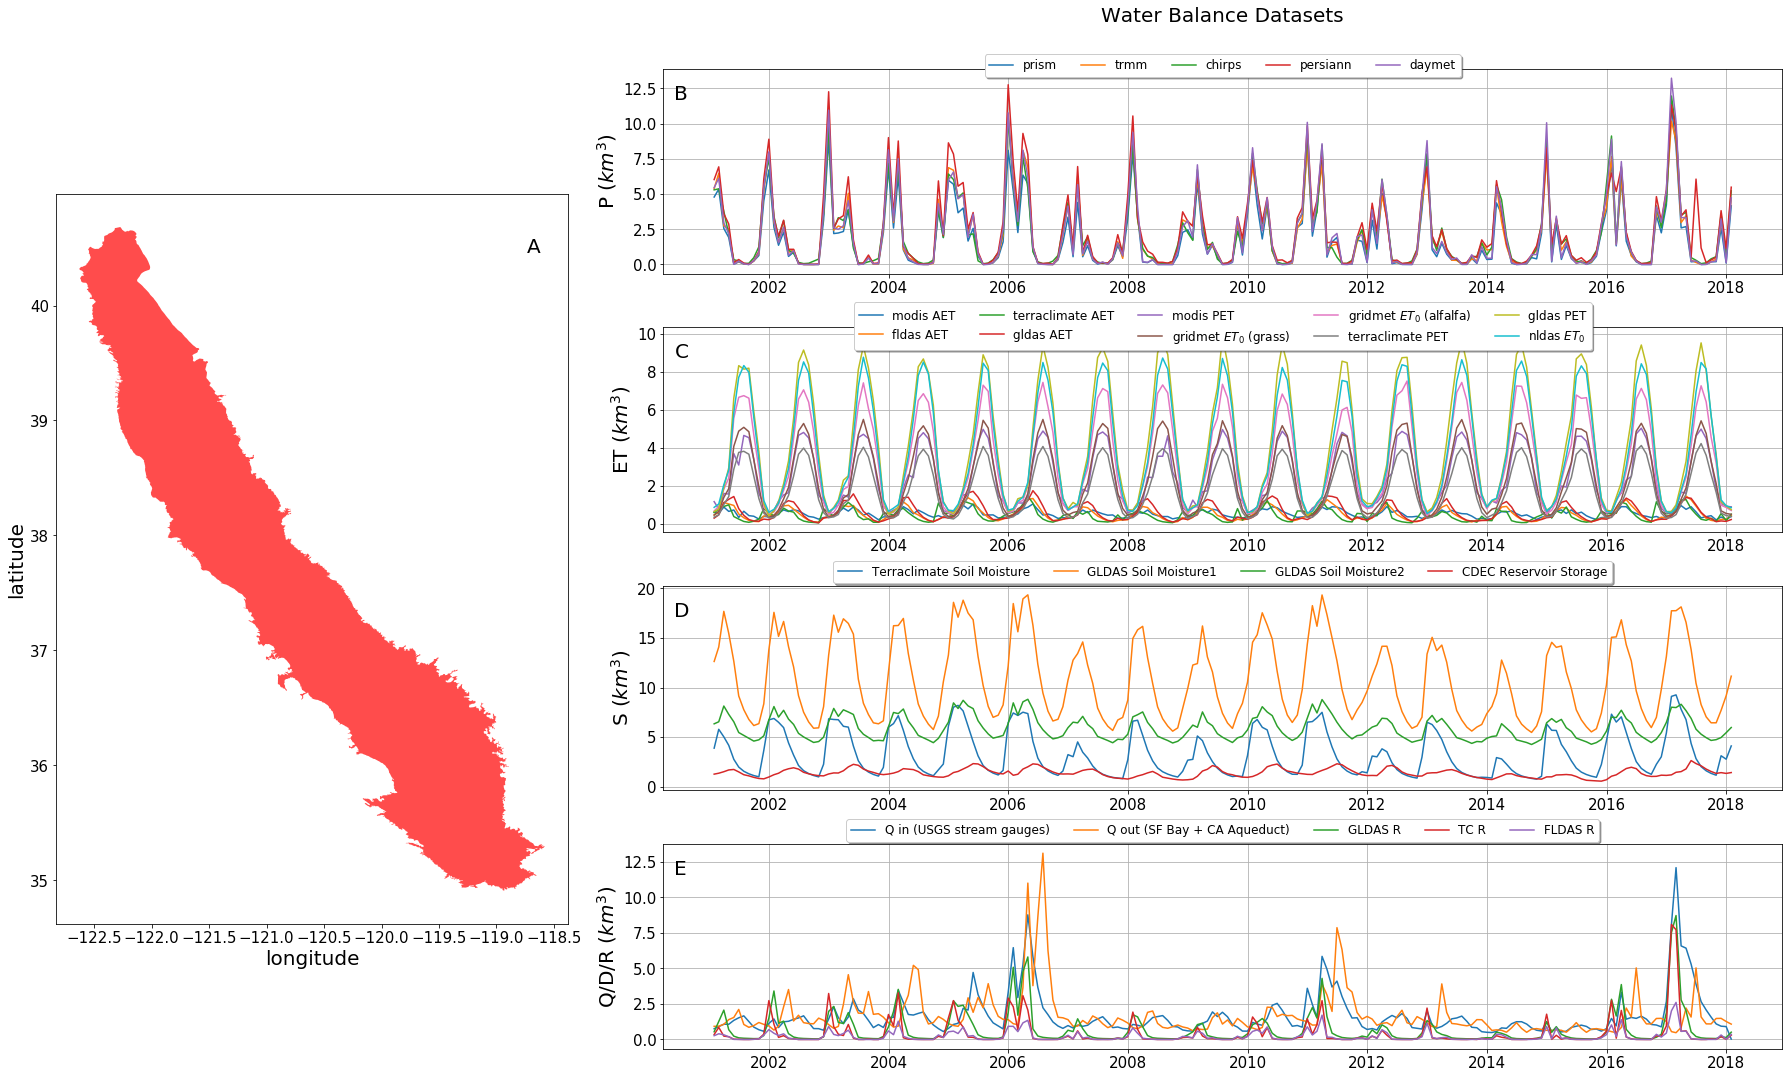

In [207]:
# Plot all the data for CV
cv_df = df.copy()

plt.figure(figsize=(25, 15))

G = gridspec.GridSpec(4, 3)

# Plot the basemaps
axes_1 = plt.subplot(G[:, 0])
cvsa.plot(ax=axes_1, color = "red", alpha = 0.7)
# axes_1.set_title('''
#     CV Watershed area = {} $km^2$ 
# '''.format(round(sa_km3, 3)), size = 20)
axes_1.set_xlabel("longitude", size = 20)
axes_1.set_ylabel("latitude", size = 20)
axes_1.annotate("A", xy=(0.92, 0.92), xycoords="axes fraction", size = 20)
axes_1.tick_params(axis='both', which='major', labelsize=15)

axes_2 = plt.subplot(G[0:1, 1:])
axes_2.set_title("Water Balance Datasets", size = 20, y=1.2)
axes_2.plot(cv_df.index, cv_df.p_prism, label = "prism")
axes_2.plot(cv_df.index, cv_df.p_trmm, label = "trmm")
axes_2.plot(cv_df.index, cv_df.p_chirps, label = "chirps")
axes_2.plot(cv_df.index, cv_df.p_persiann, label = "persiann")
axes_2.plot(cv_df.index, cv_df.p_daymet, label = "daymet")
axes_2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), fancybox=True, shadow=True, ncol=7, prop = {"size":12})
axes_2.set_ylabel("P ($km^3$)", size = 20)
# axes_2.set_xticklabels([])
axes_2.annotate("B", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_2.tick_params(axis='both', which='major', labelsize=15)
axes_2.grid(True)

axes_3 = plt.subplot(G[1:2, 1:])
axes_3.plot(cv_df.index, cv_df.modis_aet, label = "modis AET")
axes_3.plot(cv_df.index, cv_df.fldas_aet, label = "fldas AET")
axes_3.plot(cv_df.index, cv_df.tc_aet, label = "terraclimate AET")
axes_3.plot(cv_df.index, cv_df.gldas_aet, label = "gldas AET")

axes_3.plot(cv_df.index, cv_df.modis_pet, label = "modis PET")
axes_3.plot(cv_df.index, cv_df.gmet_eto, label = "gridmet $ET_0$ (grass)")
axes_3.plot(cv_df.index, cv_df.gmet_etr, label = "gridmet $ET_0$ (alfalfa)")
axes_3.plot(cv_df.index, cv_df.tc_pet, label = "terraclimate PET")
axes_3.plot(cv_df.index, cv_df.gldas_etr, label = "gldas PET")
axes_3.plot(cv_df.index, cv_df.nldas_etr, label = "nldas $ET_0$")

axes_3.set_ylabel("ET ($km^3$)", size = 20)
axes_3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=5, prop = {"size":12})
axes_3.annotate("C", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_3.tick_params(axis='both', which='major', labelsize=15)
axes_3.grid(True)

axes_4 = plt.subplot(G[2:3, 1:])
axes_4.plot(cv_df.index, cv_df.tc_sm, label = "Terraclimate Soil Moisture")
axes_4.plot(cv_df.index, cv_df.gldas_sm, label = "GLDAS Soil Moisture1")
axes_4.plot(cv_df.index, cv_df.gldas_m, label = "GLDAS Soil Moisture2")
# axes_4.plot(cv_df.index, cv_df.fldas_swe, label = "fldas SWE")
# axes_4.plot(cv_df.index, cv_df.gldas_swe, label = "gldas SWE")
axes_4.plot(cv_df.index, cv_df.storage_km3, label = "CDEC Reservoir Storage")
axes_4.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=7, prop = {"size":12})
axes_4.set_ylabel("S ($km^3$)", size = 20)
axes_4.annotate("D", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_4.tick_params(axis='both', which='major', labelsize=15)
axes_4.grid(True)

axes_5 = plt.subplot(G[3:4, 1:])
axes_5.plot(cv_df.index, cv_df.q_in, label = "Q in (USGS stream gauges)")
axes_5.plot(cv_df.index, cv_df.q_out, label = "Q out (SF Bay + CA Aqueduct)")
axes_5.plot(cv_df.index, cv_df.gldas, label = "GLDAS R")
axes_5.plot(cv_df.index, cv_df.tc_r, label = "TC R")
axes_5.plot(cv_df.index, cv_df.fldas_r, label = "FLDAS R")
axes_5.set_ylabel("Q/D/R ($km^3$)", size = 20)
axes_5.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=7, prop = {"size":12})
axes_5.annotate("E", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_5.tick_params(axis='both', which='major', labelsize=15)
axes_5.grid(True)

plt.tight_layout()

In [208]:
# calculate means for the CV (df)
df["aet_mean"] = np.mean([df['fldas_aet'], df['gldas_aet'],df['modis_aet'],df['tc_aet']],axis = 0)
df["pet_mean"] = np.mean([df['modis_pet'],df['tc_pet'],df['gmet_eto'],df['gmet_etr']],axis = 0) # We drop GLDAS and NLDAS as they are biased high for the CV 
df["p_mean"] = np.mean([df['p_prism'], df['p_chirps'],df['p_persiann'],df['p_trmm'],df['p_daymet']],axis = 0)
df['sm_mean'] = np.mean([df['gldas_sm'], df['tc_sm'], df["gldas_m"]],axis = 0)
df['r_mean'] = np.mean([df['gldas'], df['fldas_r'], df["tc_r"], df['q_in']],axis = 0)
# Compute the effective runoff as mean(cvw_runoff) - mean(cv_runoff)
df['r_eff'] = np.mean([cvwdf['gldas'], cvwdf['fldas_r'], cvwdf["tc_r"]],axis = 0) - np.mean([df['gldas'], df['fldas_r'], df["tc_r"], df['q_in']],axis = 0)
df['et_eff'] = np.mean([df.modis_aet + df.modis_pet, df.tc_aet + df.tc_pet, df.gldas_aet + df.gldas_etr], axis = 0)#np.sum([et_data.aet_mean, et_data.pet_mean], axis = 0)
df['et_eff'] = np.sum([df.aet_mean, df.pet_mean], axis = 0)#np.sum([et_data.aet_mean, et_data.pet_mean], axis = 0)

# Calc means for the CV Watershed (cvwdf)
cvwdf["aet_mean"] = np.mean([cvwdf['fldas_aet'], cvwdf['gldas_aet'],cvwdf['modis_aet'],cvwdf['tc_aet']],axis = 0)
cvwdf["p_mean"] = np.mean([cvwdf['p_prism'], cvwdf['p_chirps'],cvwdf['p_persiann'],cvwdf['p_trmm'],cvwdf['p_daymet']],axis = 0)
cvwdf['sm_mean'] = np.mean([cvwdf['gldas_sm'], cvwdf['tc_sm'], cvwdf["gldas_m"]],axis = 0)
cvwdf['swe_mean'] =  np.mean([cvwdf['fldas_swe'],cvwdf['gldas_swe']], axis = 0)
cvwdf["cv_pet_mean"] = np.mean([df['modis_pet'], df['tc_pet'], df['gmet_eto'], df['gmet_etr'], df['gldas_etr'], df['nldas_etr']],axis = 0)

cvwdf['et_eff'] = np.sum([df['pet_mean'],df['aet_mean'], cvwdf['aet_mean']],axis = 0)


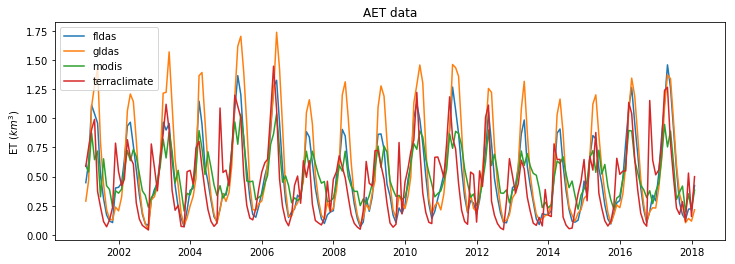

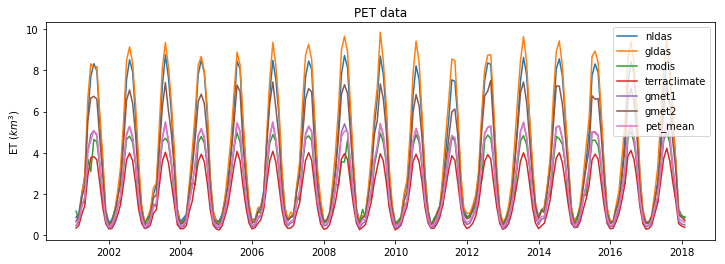

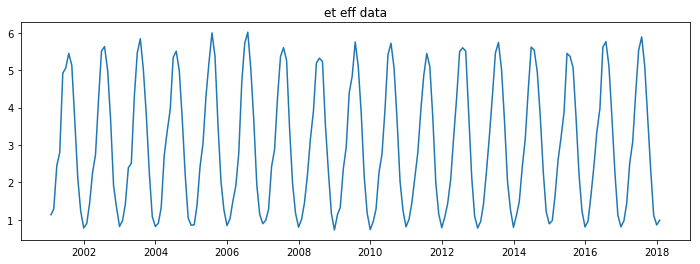

In [209]:
# Check the ET specifically for CV 

plt.figure(figsize = (12,4))
plt.title("AET data")
plt.plot(df.fldas_aet, label = "fldas")
plt.plot(df.gldas_aet, label = 'gldas')
plt.plot(df.modis_aet, label = 'modis')
plt.plot(df.tc_aet, label = "terraclimate")
plt.ylabel("ET ($km^3$)")
plt.legend()

plt.figure(figsize = (12,4))
plt.title("PET data")
plt.plot(df.nldas_etr, label = "nldas")
plt.plot(df.gldas_etr, label = 'gldas')
plt.plot(df.modis_pet, label = 'modis')
plt.plot(df.tc_pet, label = "terraclimate")
plt.plot(df.gmet_eto, label = "gmet1")
plt.plot(df.gmet_etr, label = "gmet2")
# plt.plot(df.et_mean, label = "MEAN")

plt.plot(df.pet_mean)
plt.ylabel("ET ($km^3$)")
plt.legend()

plt.figure(figsize = (12,4))
plt.title("et eff data")
plt.plot(df.et_eff, label = "effective et")

In [210]:
# TODO: include the code to Process the GRACE data 

# Grace data

grace = pd.read_csv("../data/grace_argus.csv")

# Initialize the datetime columns
grace['dt'] = pd.to_datetime(grace[grace.columns[0]])
grace = grace.set_index(pd.to_datetime(grace[grace.columns[0]]))
grace.drop(["dt"],axis = 1, inplace = True)

# Subtract reservoir storage, soil moisture, SWE from grace 
grace['adj'] = grace.grace_mean[1:] - cvwdf.sm_mean.diff()[1:] - cvwdf.storage_km3.diff()[1:] - cvwdf.swe_mean.diff()[1:]

# Wells data (processed by zihan using Faunt 2009 SY values )
wells = pd.read_csv("../data/wells_ds_faunt_sy.csv")
wells.month = wells.month.astype(str)
wells.year = wells.year.astype(str)
wells.month = wells.month.str.zfill(2)

wells['Date'] = pd.to_datetime(wells.year + wells.month , format="%Y%m") + MonthEnd(1)
wells.index = wells.Date
wells.drop(['Date'], axis =1, inplace = True)

wells['ds_km3'] = wells[wells.columns[-1]] * 55000 * 1e-5

# c2vsim storage data 
c2vs = pd.read_csv("../data/all_data_cv.csv")
c2vs.ds = c2vs.s.diff()
df['c2vsim'] = c2vs.s.diff().values[-len(df):]

In [211]:
# Do the balances

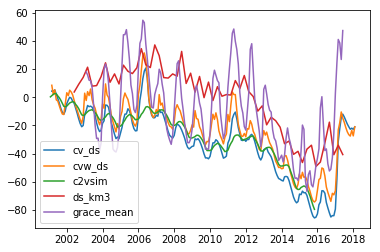

In [212]:
# Equations 1 and 2 in paper
df["cv_ds"] = df.p_mean - (df.et_eff) - df.q_out + df.q_in + df.r_mean - df.sm_mean.diff() - df.storage_km3.diff() 
cvwdf["cvw_ds"] = cvwdf.p_mean - (cvwdf.et_eff ) - cvwdf.q_out  - cvwdf.sm_mean.diff() - cvwdf.storage_km3.diff() - cvwdf.swe_mean.diff()

plt.plot(np.cumsum(df.cv_ds))
plt.plot(np.cumsum(cvwdf.cvw_ds))
plt.plot(np.cumsum(df.c2vsim))
plt.plot(wells.ds_km3)
plt.plot(grace.grace_mean)
plt.legend()

plt.show()

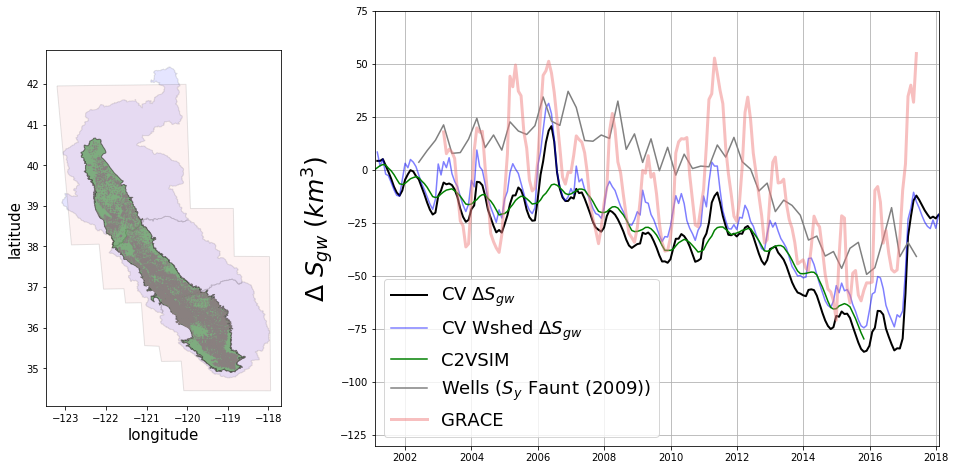

In [213]:
plt.figure(figsize=(16, 8))

G = gridspec.GridSpec(2, 3)

# Plot the basemaps
ax = plt.subplot(G[:, 0])

# Plot the huc4s
s.plot(ax = ax, color = 'blue', alpha = 0.1, edgecolor = "black")
sj.plot(ax = ax, color = 'blue', alpha = 0.1, edgecolor = "black")
t.plot(ax = ax, color = 'blue', alpha = 0.1,  edgecolor = "black")

# Rivers, CV, canals, CA, irrigated, non irrigated
# rivers.plot(ax = ax, color = "blue", label = "major rivers")
cvsa.plot(ax = ax, color = "green", edgecolor = "black", alpha = 0.5, label = "central valley")
# canals.plot(ax = ax, color = "red", edgecolor = "none", alpha = 0.5, label = "CVP canals / aqueducts")
casgem.plot(ax = ax, marker = ".", markersize = 0.1, color = 'gray')
# irrigated.plot(ax = ax, color = "green", alpha = 0.7, label = "irrigated")
# non_irrigated.plot(ax = ax, color = "yellow", alpha = 0.7, label = 'non-irrigated')
grace_sa.plot(ax = ax, color = "lightcoral", alpha = 0.1, edgecolor = 'black')

plt.ylabel('latitude', size = 15)
plt.xlabel('longitude', size = 15)

# Plot the timeseries
axes_4 = plt.subplot(G[0:2, 1:])
axes_4.plot(df.index, np.cumsum(df.cv_ds), color="black", linewidth = 2, label = "CV $\Delta S_{gw}$")
axes_4.plot(df.index, np.cumsum(cvwdf.cvw_ds), color="blue",alpha = 0.5, label = "CV Wshed $\Delta S_{gw}$")
axes_4.plot(df.index, np.cumsum(df.c2vsim), color="green", label = "C2VSIM")
# axes_4.plot(df2.index, np.cumsum(df2.ds), color="red", label = "CVW $\Delta S_{gw}$ ")
axes_4.plot(wells.index, wells.ds_km3, color="gray", label = "Wells ($S_y$ Faunt (2009))")
axes_4.plot(grace.index, grace.adj, color="lightcoral", linewidth = 3, alpha = .5, label = "GRACE")

axes_4.set_ylim(-130,75)
axes_4.set_xlim(df.index[0],df.index[-1])

axes_4.set_ylabel('$\Delta$ $S_{gw}$ ($km^3$)', size = 25) 
axes_4.legend(loc = "lower left",  prop={'size':18})

plt.grid(True)
G.update(wspace=0.4, hspace=0.3) # set the spacing between axes. 

# plt.tight_layout()
plt.show()

In [148]:
df.to_csv("../data/WRR_cv_balance_fin.csv")
cvwdf.to_csv("../data/WRR_cvw_balance_fin.csv")

In [214]:
# Do triple collocation on grace, wells, rs model

def calc_tc_error(x,y,z):
    e_x = np.sqrt(np.abs(np.mean((x - y) * (x - z))))
    e_y = np.sqrt(np.abs(np.mean((y - x) * (y - z))))
    e_z = np.sqrt(np.abs(np.mean((z - x) * (z - y))))

    return e_x, e_y, e_z

def scale_to_ref(src, ref):
    return ((src - np.mean(src)) /
            np.std(src)) * np.std(ref) + np.mean(ref)

In [219]:
from itertools import combinations

tc_dat = [np.cumsum(df.cv_ds),  np.cumsum(df.c2vsim),wells.ds_km3, grace.adj]

combos=combinations([0,1,2,3], 3) 

out = {0:[], # rs
       1:[], # wells
       2:[], # c2vsim
       3:[]  # grace 
        }

# out = {}

for idx,i in enumerate(combos):
    x = tc_dat[i[0]]
    y = tc_dat[i[1]]
    z = tc_dat[i[2]]
    
    y_scaled = scale_to_ref(y,x)
    z_scaled = scale_to_ref(z,x)

    e_x, e_y, e_z = calc_tc_error(x, y_scaled, z_scaled)
    
    errors = calc_tc_error(x, y_scaled, z_scaled)
    
    for idx,j in enumerate(i):
        out[j].append(errors[idx])
        
D = {k:np.array(v).mean() for k,v in out.items() }
maxs = {k:np.array(v).max() for k,v in out.items() }
mins = {k:np.array(v).min() for k,v in out.items() }
stds = {k:np.array(v).std() for k,v in out.items() }

In [216]:
# Merge all the DFS and create a mean error 

merged1 = pd.merge(df, wells, left_index=True, right_index=True, how = "outer")
merged2 = pd.merge(merged1, grace, left_index=True, right_index=True, how = "outer")

for idx,x in enumerate(["cv_ds",'ds_km3', "c2vsim",'adj']):
    merged2[x+"_max"] = merged2[x] + D[idx]
    merged2[x+"_min"] = merged2[x] - D[idx]
    
merged2['cs'] = np.cumsum(df.cv_ds)
merged2['ds_mean'] = np.nanmean(merged2[["cs",'ds_km3', "c2vsim",'adj']], axis = 1)
merged2['upper_bound'] = np.nanmean(merged2[["cs",'ds_km3_max', "c2vsim_max",'adj_max']], axis = 1)
merged2['lower_bound'] = np.nanmean(merged2[["cs",'ds_km3_min', "c2vsim_min",'adj_min']], axis = 1)

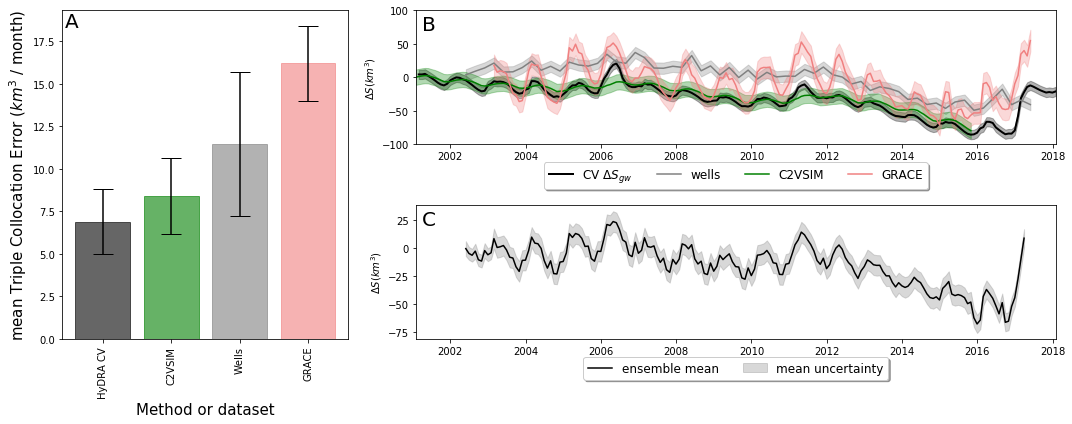

In [228]:
# Plot the TC bar chart and time series
plt.figure(figsize = (15,6))

G = gridspec.GridSpec(4, 3)

# Plot the basemaps
ax = plt.subplot(G[:, 0])

bars = plt.bar(range(len(D)), list(D.values()),yerr=list(stds.values()), ecolor='black', capsize=10, alpha =0.6, align='center')
bars[0].set_color('black')
bars[1].set_color('green')
bars[2].set_color('gray')
bars[-1].set_color('lightcoral')
plt.xticks(range(len(D)), ["HyDRA CV",  "C2VSIM","Wells",  "GRACE"], rotation='vertical')
plt.ylabel("mean Triple Collocation Error ($km^3$ / month)", size = 15)
plt.xlabel("Method or dataset", size = 15)

ax.annotate("A", xy=(0.01, 0.95), xycoords="axes fraction", size = 20)


# ax2 = plt.subplot(G[:, 0])
axes_2 = plt.subplot(G[0:2, 1:])
axes_2.plot(df.index, np.cumsum(df.cv_ds), color="black", linewidth = 2, label = "CV $\Delta S_{gw}$")
axes_2.fill_between(df.index, np.cumsum(df.cv_ds)+D[0], np.cumsum(df.cv_ds)-D[0], color="black", alpha = 0.3)
# axes_2.fill_between(df.index, np.cumsum(df.cv_ds)+maxs[0], np.cumsum(df.cv_ds)-maxs[0], color="black", alpha = 0.1)

axes_2.plot(wells.index,wells.ds_km3, color="gray", label = "wells")
axes_2.fill_between(wells.index, wells.ds_km3+D[1],wells.ds_km3-D[1], color="gray", alpha = 0.3)
# axes_2.fill_between(wells.index, wells.ds_km3+maxs[1],wells.ds_km3-maxs[1], color="gray", alpha = 0.1)

axes_2.plot(df.index, np.cumsum(df.c2vsim), color="green", label = "C2VSIM")
axes_2.fill_between(df.index, np.cumsum(df.c2vsim)+D[2], np.cumsum(df.c2vsim)-D[2], color="green", alpha = 0.3)
# axes_2.fill_between(df.index, np.cumsum(df.c2vsim)+maxs[2], np.cumsum(df.c2vsim)-maxs[2], color="green", alpha = 0.1)

axes_2.plot(grace.index, grace.adj, color="lightcoral", label = "GRACE")
axes_2.fill_between(grace.index, grace.adj+D[3],  grace.adj-D[3], color="lightcoral", alpha = 0.3)
# axes_2.fill_between(grace.index, grace.adj+maxs[3],  grace.adj-maxs[3], color="lightcoral", alpha = 0.1)

axes_2.set_ylim([-100,100])
axes_2.set_xlim(df.index[0],df.index[-1])
axes_2.set_ylabel("$\Delta S (km^3)$")
axes_2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09), fancybox=True, shadow=True, ncol=7, prop = {"size":12})

axes_2.annotate("B", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)

axes_3 = plt.subplot(G[2:4, 1:])

axes_3.plot(merged2.ds_mean[16:-10], color = "black", label = 'ensemble mean')
axes_3.fill_between(merged2.index[16:-10], merged2.upper_bound[16:-10], merged2.lower_bound[16:-10] ,color = "gray", alpha = 0.3, label = "mean uncertainty")
axes_3.set_xlim(df.index[0],df.index[-1])
axes_3.set_ylabel("$\Delta S (km^3)$")
axes_3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09), fancybox=True, shadow=True, ncol=7, prop = {"size":12})
axes_3.annotate("C", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)

plt.tight_layout()
plt.show()

In [154]:
# Fit Trendlines in droughts 

In [156]:
df = pd.merge(df,wells, how = "outer", left_index = True, right_index = True)
df = pd.merge(df,grace, how = "outer", left_index = True, right_index = True)
df.ds_km3 = df.ds_km3.interpolate(method='polynomial', order=2)

In [157]:
# Droughts
idx0709 = range(69,105)
idx1216 = range(129,129+48)
# Wet winters
idx1617 =range(189,201)
idx0506 = range(57,69)

In [158]:
def fit_trend(df_column, index):
    z = np.polyfit(x=df_column.iloc[index], y=np.arange(0,len(index)), deg=1)
    p = np.poly1d(z)
    ds_trend = p(df_column.iloc[index])
    x = np.arange(len(index))
    fit = np.polyfit(x, df_column.iloc[index], 1)
    fit_fn = np.poly1d(fit)
    annual_slope = (fit_fn(x)[-1] - fit_fn(x)[0]) / 2
    
    return fit_fn, x, annual_slope

In [159]:
fns1 = []
xs1 = []
slopes1 = []

for i in [np.cumsum(df.cv_ds), np.cumsum(df.c2vsim), df.ds_km3, df.adj, np.cumsum(cvwdf.cvw_ds)]:
    fn,x,sl = fit_trend(i, idx0709)
    fns1.append(fn)
    xs1.append(x)
    slopes1.append(round(sl,2))
    

In [160]:
fns2 = []
xs2 = []
slopes2 = []

for i in [np.cumsum(df.cv_ds), np.cumsum(df.c2vsim), df.ds_km3, df.adj, np.cumsum(cvwdf.cvw_ds)]:
    fn,x,sl = fit_trend(i, idx1216)
    fns2.append(fn)
    xs2.append(x)
    slopes2.append(round(sl,2))
    

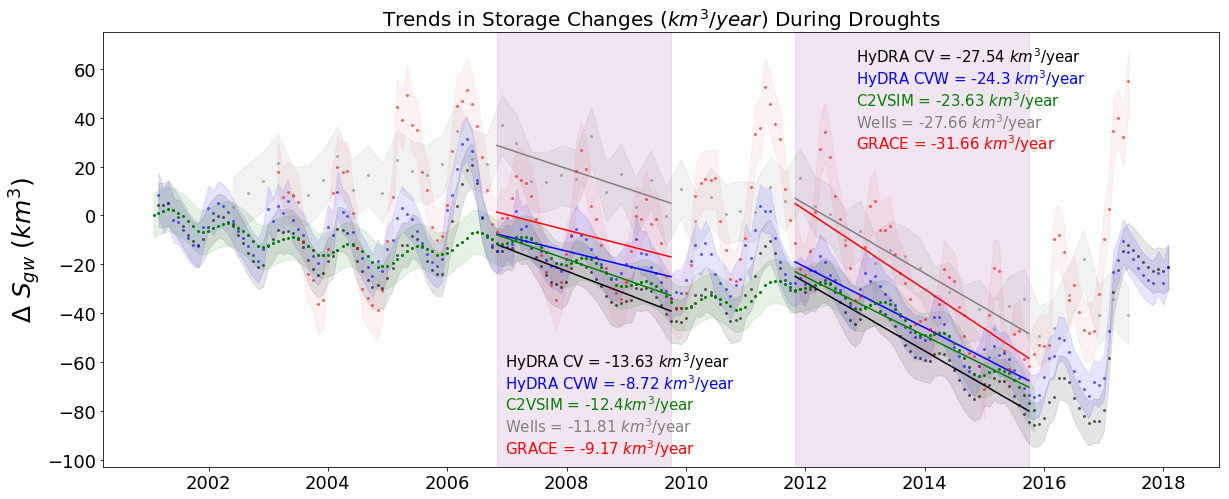

In [181]:
plt.figure(figsize = (20,8))
plt.title("Trends in Storage Changes ($km^3/year$) During Droughts", size = 20)

# RS method CV
plt.plot(df.index[idx0709], fns1[0](xs1[0]), color = 'black', label = "HyDRA CV trendlines")
plt.plot(df.index[idx1216], fns2[0](xs2[0]), color = "black")
plt.plot(df.index, np.cumsum(df.cv_ds), "o",color = 'black', ms = 2, alpha = 0.5, label = "HyDRA CV datapoints")
plt.fill_between(df.index, np.cumsum(df.cv_ds)+D[2], np.cumsum(df.cv_ds)-D[2], color="black", alpha = 0.1)

# CVW
plt.plot(df.index[idx0709], fns1[-1](xs1[-1]), color = 'blue', label = "HyDRA CVW trendlines")
plt.plot(df.index[idx1216], fns2[-1](xs2[-1]), color = "blue")
plt.plot(df.index, np.cumsum(cvwdf.cvw_ds), "o",color = 'blue', ms = 2,alpha = 0.5, label = "HyDRA CVW datapoints")
plt.fill_between(df.index, np.cumsum(cvwdf.cvw_ds)+D[2], np.cumsum(cvwdf.cvw_ds)-D[2], color="blue", alpha = 0.1)


#C2vsim
plt.plot(df.index[idx0709], fns1[1](xs1[1]), "g", label = 'C2VSIM trendlines')
plt.plot(df.index[idx1216], fns2[1](xs2[1]), color = "green")
plt.plot(df.index, np.cumsum(df.c2vsim), 'go', ms=2, label = "C2VSIM datapoints")
plt.fill_between(df.index, np.cumsum(df.c2vsim)+D[2], np.cumsum(df.c2vsim)-D[2], color="green", alpha = 0.1)

# Wells
plt.plot(df.index[idx0709], fns1[2](xs1[2]),color = 'gray', label = "Wells trendlines")
plt.plot(df.index[idx1216], fns2[2](xs2[2]), color = "gray")
plt.plot(wells.index, wells.ds_km3, 'o', color = 'gray', ms=2, alpha = 0.5, label = "Wells datapoints")
plt.fill_between(wells.index, wells.ds_km3+D[1],wells.ds_km3-D[1], color="gray", alpha = 0.1)

# GRACE 
plt.plot(df.index[idx0709], fns1[3](xs1[3]), color = 'red', label = "GRACE trendline")
plt.plot(df.index[idx1216], fns2[3](xs2[3]), color = 'red')
plt.plot(df.index, df.adj, 'o', ms=2, color = "red", alpha = 0.5, label = "GRACE datapoints")
plt.fill_between(df.index, df.adj+D[1],df.adj-D[1], color="lightcoral", alpha = 0.1)


# Labels and legend 
plt.ylabel('$\Delta$ $S_{gw}$ ($km^3$)', size = 25) 
# plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.9), fancybox=True, shadow=True, ncol=1, prop = {"size":12})
plt.tick_params(axis='both', which='major', labelsize=18)


# plt.annotate("Oct '07 - Oct 09 $ km^3 / yr$", xy=(0.354, 0.28), xycoords="axes fraction", size = 16)
plt.annotate("HyDRA CV = {} $km^3$/year".format(slopes1[0]),xy=(0.36, 0.23), xycoords="axes fraction", size = 15)
plt.annotate("HyDRA CVW = {} $km^3$/year".format(slopes1[-1]),xy=(0.36, 0.18),color = "blue", xycoords="axes fraction", size = 15)
plt.annotate("C2VSIM = {}$km^3$/year".format(slopes1[1]),xy=(0.36, 0.13), color = 'green', xycoords="axes fraction", size = 15)
plt.annotate("Wells = {} $km^3$/year".format(slopes1[2]),xy=(0.36, 0.08), color = 'gray', xycoords="axes fraction", size = 15)
plt.annotate("GRACE = {} $km^3$/year".format(slopes1[3]),xy=(0.36, 0.03), color = 'red',xycoords="axes fraction", size = 15)

plt.axvspan(df.index[idx0709][0], df.index[idx0709][-1], alpha=0.1, color='purple')
plt.axvspan(df.index[idx1216][0], df.index[idx1216][-1], alpha=0.1, color='purple')


# plt.annotate("Oct '11 - Oct 15 $ km^3 / yr$ ", xy=(0.62, 0.93), xycoords="axes fraction", size = 16)
plt.annotate("HyDRA CV = {} $km^3$/year".format(slopes2[0]),xy=(0.675, 0.93), xycoords="axes fraction", size = 15)
plt.annotate("HyDRA CVW = {} $km^3$/year".format(slopes2[-1]),xy=(0.675, 0.88),color = "blue", xycoords="axes fraction", size = 15)
plt.annotate("C2VSIM = {} $km^3$/year".format(slopes2[1]),xy=(0.675, 0.83), color = 'green', xycoords="axes fraction", size = 15)
plt.annotate("Wells = {} $km^3$/year".format(slopes2[2]),xy=(0.675, 0.78), color = 'gray', xycoords="axes fraction", size = 15)
plt.annotate("GRACE = {} $km^3$/year".format(slopes2[3]),xy=(0.675, 0.73), color = 'red',xycoords="axes fraction", size = 15)

plt.show()